In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.use('Agg')

In [2]:
from IPython.display import Image

In [2]:
from src.random_walk import parameter_sweep

# The off-line $\lambda$-return

- The $\lambda$-return gives us an alternative way of moving smoothly between MC and one-step TD methods that can be compared with the $n$-step bootstrapping way developed in Chapter 7.
- There we assessed effectiveness on a 19-state random walk task (Example 7.1, page 144).
- Figure 12.3 shows the performance of the off-line $\lambda$-return algorithm on this task alongside that of the $n$-step methods (repeated from Figure 7.2).
- The experiment was just as described earlier except that for the $\lambda$-return algorithm we varied $\lambda$ instead of $n$.
- The performance measure used is the estimated root-mean-square error between the correct and estimated values of each state measured at the end of the episode, averaged over the first 10 episodes and the 19 states.
- Note that overall performance of the off-line $\lambda$-return algorithms is comparable to that of the $n$-step algorithms.
- In both cases we get the best performance with an intermediate value of the bootstrapping parameter, $n$ for $n$-step methods and $\lambda$ for the off-line $\lambda$-return algorithm.

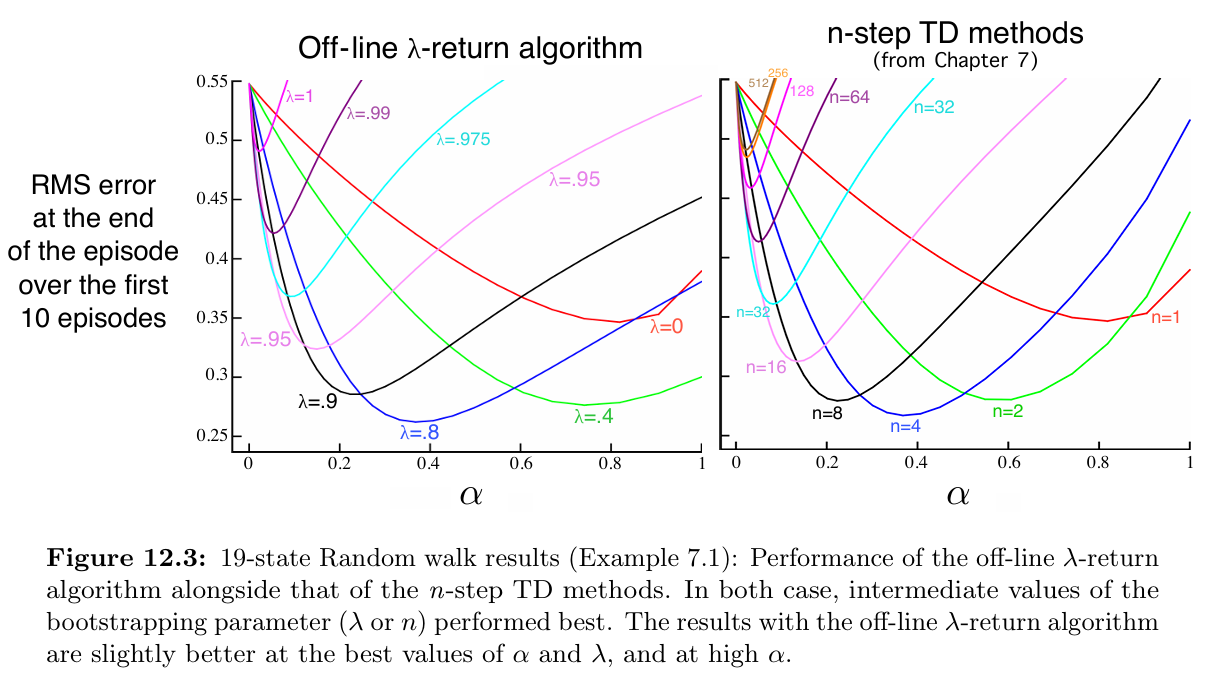

In [4]:
Image(filename="../book_images/Figure_12_3.PNG")

In [3]:
from src.random_walk import OffLineLambdaReturn

In [4]:
# Trace-decay parameters
trace_decays = [0.0, 0.4, 0.8, 0.9, 0.95, 0.975, 0.99, 1]

# Step-size parameters
step_sizes = [np.arange(0, 1.1, 0.1),
              np.arange(0, 1.1, 0.1),
              np.arange(0, 1.1, 0.1),
              np.arange(0, 1.1, 0.1),
              np.arange(0, 1.1, 0.1),
              np.arange(0, 0.55, 0.05),
              np.arange(0, 0.22, 0.02),
              np.arange(0, 0.11, 0.01)]

# Number of runs
runs = 50

In [5]:
parameter_sweep(OffLineLambdaReturn, runs, trace_decays, step_sizes, title=r"Off-line $\lambda$-return algorithm")

100%|██████████| 50/50 [03:11<00:00,  3.83s/it]


In [6]:
plt.savefig("../generated_images/figure_12_3.png")
plt.close()

# TD$(\lambda)$

It is revealing to revisit the 19-state random walk example (Example 7.1) to see how well TD$(\lambda)$ does in approximating the off-line-return algorithm. The results for both algorithms are shown in Figure 12.6. 
- For each $\lambda$ value, if $\alpha$ is selected:
  - optimally for it (or smaller), then the 2 algorithms perform virtually identically,
  - larger than is optimal, however, then the $\lambda$-return algorithm is only a little worse whereas TD$(\lambda)$ is much worse and may even be unstable.
- This is not catastrophic for TD$(\lambda)$ on this problem, as these higher parameter values are not what one would want to use anyway, but for other problems it can be a significant weakness.

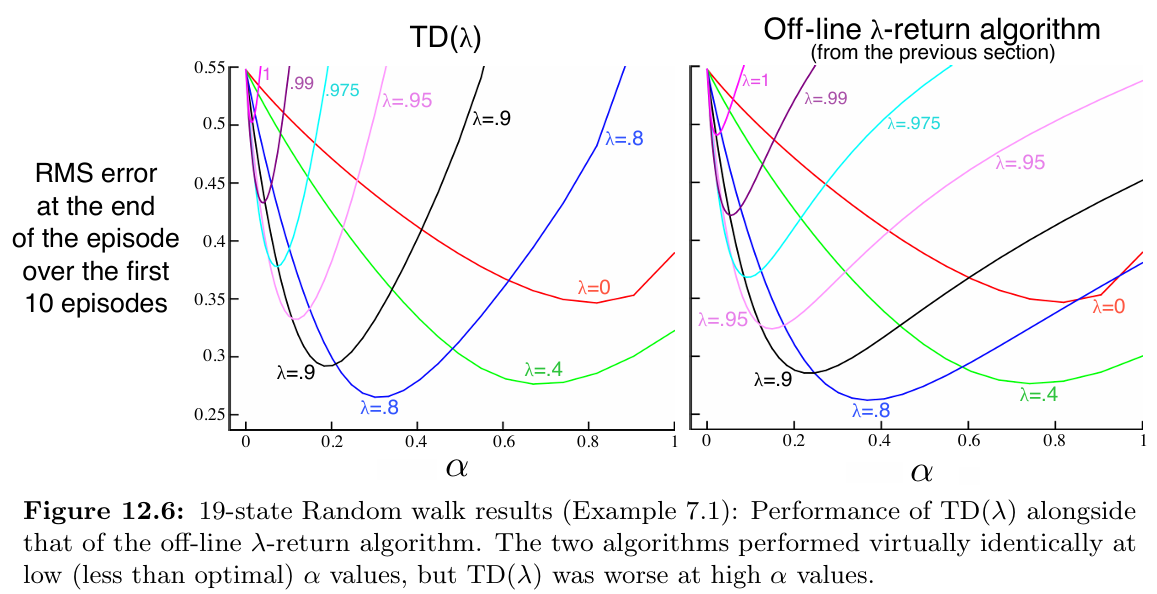

In [9]:
Image(filename="../book_images/Figure_12_6.PNG")

In [10]:
from src.random_walk import TemporalDifferenceLambda

In [11]:
# Trace-decay parameters
trace_decays = [0.0, 0.4, 0.8, 0.9, 0.95, 0.975, 0.99, 1]

# Step-size parameters
step_sizes = [np.arange(0, 1.1, 0.1),
              np.arange(0, 1.1, 0.1),
              np.arange(0, 0.99, 0.09),
              np.arange(0, 0.55, 0.05),
              np.arange(0, 0.33, 0.03),
              np.arange(0, 0.22, 0.02),
              np.arange(0, 0.11, 0.01),
              np.arange(0, 0.044, 0.004)]

# Number of runs
runs = 50

In [12]:
parameter_sweep(TemporalDifferenceLambda, runs, trace_decays, step_sizes, title=r"TD$(\lambda)$")

100%|██████████| 50/50 [01:06<00:00,  1.33s/it]


In [13]:
plt.savefig("../generated_images/figure_12_6.png")
plt.close()

# The on-line $\lambda$-return = True online TD$(\lambda)$

- The online $\lambda$-return algorithm is fully online, determining a new weight vector $\mathbf{w}_t$ at each step $t$ during an episode, using only information available at time $t$.
- Its main drawback is that it is computationally complex, passing over the portion of the episode experienced so far on every step. 
- Note that it is strictly more complex than the off-line $\lambda$-return algorithm, which passes through all the steps at the time of termination but does not make any updates during the episode.
- In return, the online algorithm can be expected to perform better than the off-line one, not only during the episode when it makes an update while the off-line algorithm makes none, but also at the end of the episode because the weight vector used in bootstrapping (in $G_{t:h}^\lambda$) has had a larger number of informative updates.
- This effect can be seen if one looks carefully at Figure 12.8, which compares the 2 algorithms on the 19-state random walk task.


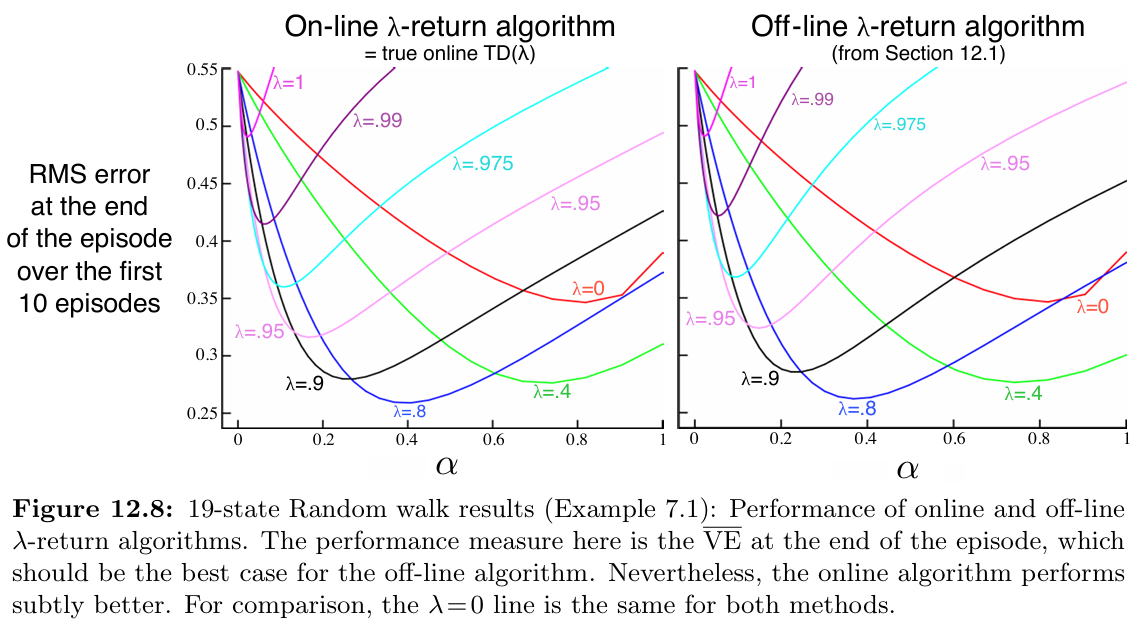

In [14]:
Image(filename="../book_images/Figure_12_8.PNG")

In [15]:
from src.random_walk import OnLineLambdaReturn

In [16]:
# Trace-decay parameters
trace_decays = [0.0, 0.4, 0.8, 0.9, 0.95, 0.975, 0.99, 1]

# Step-size parameters
step_sizes = [np.arange(0, 1.1, 0.1),
              np.arange(0, 1.1, 0.1),
              np.arange(0, 1.1, 0.1),
              np.arange(0, 1.1, 0.1),
              np.arange(0, 1.1, 0.1),
              np.arange(0, 0.88, 0.08),
              np.arange(0, 0.44, 0.04),
              np.arange(0, 0.11, 0.01)]

# Number of runs
runs = 50

In [17]:
parameter_sweep(OnLineLambdaReturn, runs, trace_decays, step_sizes, title=r"On-line $\lambda$-return algorithm")

100%|██████████| 50/50 [01:07<00:00,  1.36s/it]


In [18]:
plt.savefig("../generated_images/figure_12_8.png")
plt.close()